In [1]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm

In [2]:
#Read the data
data = pd.read_csv("D:/Internity/LR/dataset.csv")

In [3]:
data.head() #Let's have a look at our dataset

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
data.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

In [5]:
#Let us do some data preprocessing to refine the dataset
data.drop(['Unnamed: 0'], axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


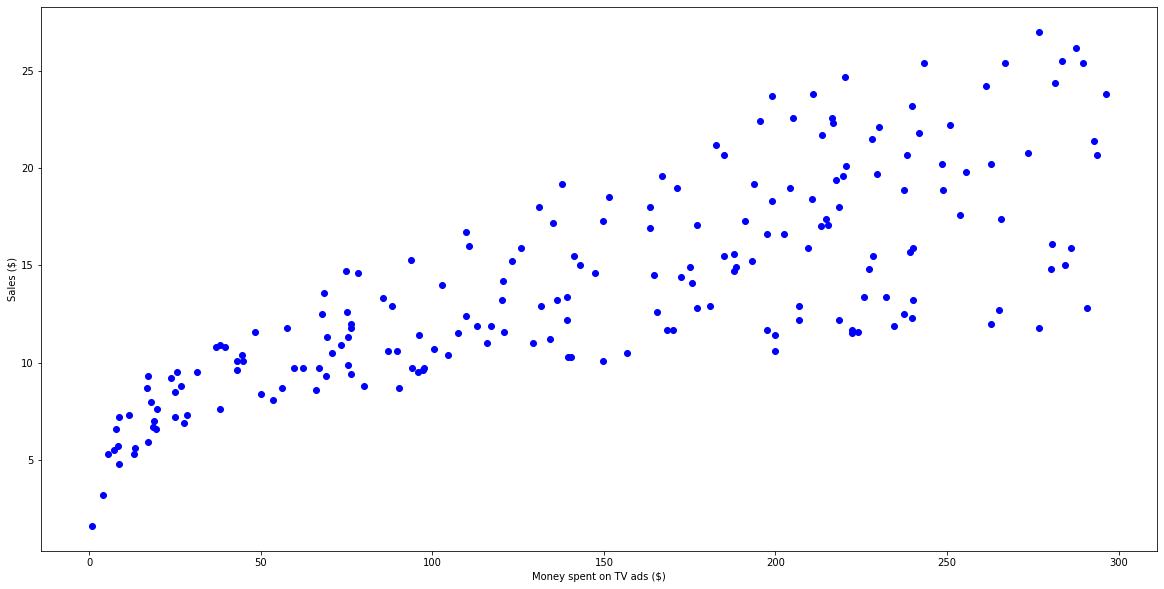

In [6]:
#Simple Linear Regression

plt.figure(figsize=(20, 10))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()



In [7]:
#Cool! we plotted a graph for our data for TV vs Sales

In [8]:
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(reg.coef_[0][0]) #co-efficient
print(reg.intercept_[0]) #intercept

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.047536640433019764
7.032593549127693
The linear model is: Y = 7.0326 + 0.047537X


In [10]:
predictions = reg.predict(X)

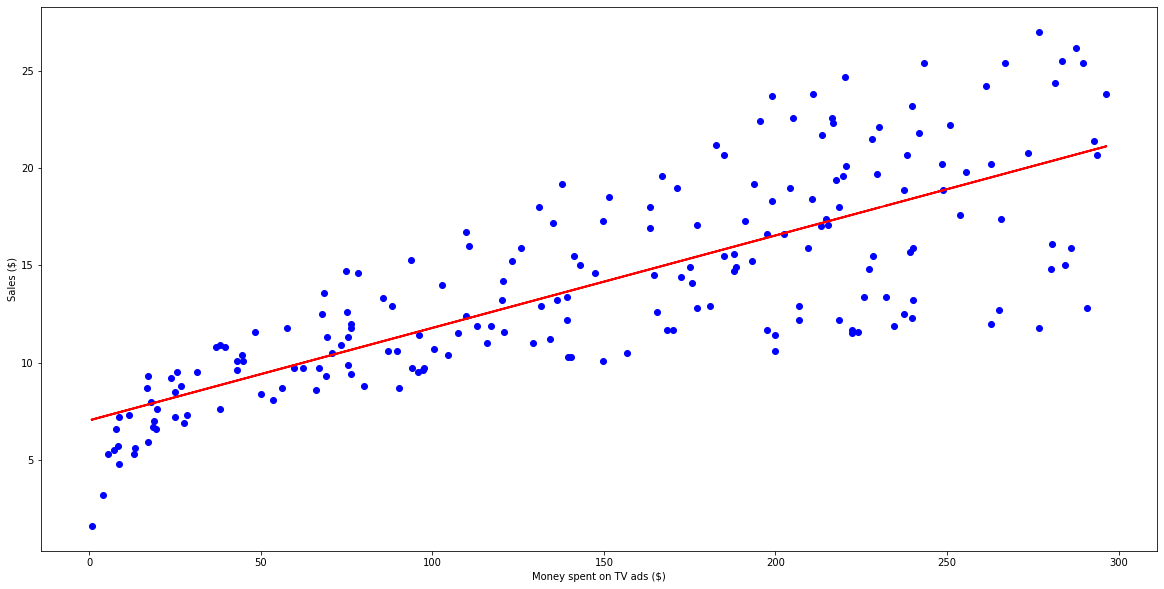

In [13]:
#Now Let’s visualize how the line fits the data

plt.figure(figsize=(20, 10))
plt.scatter(
    data['TV'],
    data['sales'],
    c='blue'
)
plt.plot(
    data['TV'],
    predictions,
    c='red',
    linewidth=2
)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")
plt.show()

In [14]:
#checking the relevancy of the model
X = data['TV']
y = data['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Sun, 05 Jan 2020   Prob (F-statistic):           1.47e-42
Time:                        22:59:47   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

C:\Users\bdube\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [15]:
#R-squared value above is found to be 0.612
#Therefore, 61.2% of the variability of sales is explained by the amount spent on TV ads

In [16]:
#This accuracy could be further improved by using Multiple Linear regression over this dataset.